In [ ]:
# Project Image Classification By Sreedhara Jagatagar Sreenivasa

#Image Classification In this project, you'll classify images from the CIFAR-10 dataset 
#(https://www.cs.toronto.edu/~kriz/cifar.html). The dataset consists of airplanes, dogs, cats, and other objects. 
#You'll preprocess the images, then train a convolutional neural network on all the samples. 
#The images need to be normalized and the labels need to be one-hot encoded. 
#You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers. 
#At the end, you'll get to see your neural network's predictions on the sample images.

#Get the Data Run the following cell to download the CIFAR-10 dataset for python 
#(https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).
#Data CIFAR-10 is an established computer-vision dataset used for object recognition. 
#It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing 
#one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and 
#Geoffrey Hinton. Let's get the data by running the following function

# Load Libraries
# Import Data
# Define Test Function
# Define Helper Function
# Explore the Data
# Impliment Preprocess Functions
    ## Normize the images 
    ## one-hot encoded the lables
# Preprocess all the data and save it
# Build the network
    ## Define input
    ## Define Convolution and Max Pooling Layer
    ## Define Flatten Layer
    ## Fully-Connected Layer
    ## Define Output Layer
# Create Convolutional Model
# Train the Neural Network
    ## Single Optilization
    ## Set Hyper Parameter
    ## Train single batch
    ## Display Accuracy
    ## Train all the batch
    ## Display Accuracy
    ## Save the Model   
# Test the Model
    ## Display Accuracy

# Load Libraries

In [2]:
# Load Libraries
from urllib.request import urlretrieve 
from os.path import isfile, isdir
from tqdm import tqdm 
#import problem_unittests as tests
import tarfile


import pickle 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer

# Import Data

In [3]:
# Import Data
 
cifar10_dataset_folder_path = 'cifar-10-batches-py\cifar-10-batches-py'
 
class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close() 

# Define Test Function

In [4]:
# Test Functions
import os
import numpy as np
import tensorflow as tf
import random
from unittest.mock import MagicMock


def _print_success_message():
    return print('Tests Passed')


def test_folder_path(cifar10_dataset_folder_path):
    assert cifar10_dataset_folder_path is not None,\
        'Cifar-10 data folder not set.'
    assert cifar10_dataset_folder_path[-1] != '/',\
        'The "/" shouldn\'t be added to the end of the path.'
    assert os.path.exists(cifar10_dataset_folder_path),\
        'Path not found.'
    assert os.path.isdir(cifar10_dataset_folder_path),\
        '{} is not a folder.'.format(os.path.basename(cifar10_dataset_folder_path))

    train_files = [cifar10_dataset_folder_path + '/data_batch_' + str(batch_id) for batch_id in range(1, 6)]
    other_files = [cifar10_dataset_folder_path + '/batches.meta', cifar10_dataset_folder_path + '/test_batch']
    missing_files = [path for path in train_files + other_files if not os.path.exists(path)]

    assert not missing_files,\
        'Missing files in directory: {}'.format(missing_files)

    print('All files found!')


def test_normalize(normalize):
    test_shape = (np.random.choice(range(1000)), 32, 32, 3)
    test_numbers = np.random.choice(range(256), test_shape)
    normalize_out = normalize(test_numbers)

    assert type(normalize_out).__module__ == np.__name__,\
        'Not Numpy Object'

    assert normalize_out.shape == test_shape,\
        'Incorrect Shape. {} shape found'.format(normalize_out.shape)

    assert normalize_out.max() <= 1 and normalize_out.min() >= 0,\
        'Incorect Range. {} to {} found'.format(normalize_out.min(), normalize_out.max())

    _print_success_message()


def test_one_hot_encode(one_hot_encode):
    test_shape = np.random.choice(range(1000))
    test_numbers = np.random.choice(range(10), test_shape)
    one_hot_out = one_hot_encode(test_numbers)

    assert type(one_hot_out).__module__ == np.__name__,\
        'Not Numpy Object'

    assert one_hot_out.shape == (test_shape, 10),\
        'Incorrect Shape. {} shape found'.format(one_hot_out.shape)

    n_encode_tests = 5
    test_pairs = list(zip(test_numbers, one_hot_out))
    test_indices = np.random.choice(len(test_numbers), n_encode_tests)
    labels = [test_pairs[test_i][0] for test_i in test_indices]
    enc_labels = np.array([test_pairs[test_i][1] for test_i in test_indices])
    new_enc_labels = one_hot_encode(labels)

    assert np.array_equal(enc_labels, new_enc_labels),\
        'Encodings returned different results for the same numbers.\n' \
        'For the first call it returned:\n' \
        '{}\n' \
        'For the second call it returned\n' \
        '{}\n' \
        'Make sure you save the map of labels to encodings outside of the function.'.format(enc_labels, new_enc_labels)

    _print_success_message()


def test_nn_image_inputs(neural_net_image_input):
    image_shape = (32, 32, 3)
    nn_inputs_out_x = neural_net_image_input(image_shape)

    assert nn_inputs_out_x.get_shape().as_list() == [None, image_shape[0], image_shape[1], image_shape[2]],\
        'Incorrect Image Shape.  Found {} shape'.format(nn_inputs_out_x.get_shape().as_list())

    assert nn_inputs_out_x.op.type == 'Placeholder',\
        'Incorrect Image Type.  Found {} type'.format(nn_inputs_out_x.op.type)

    assert nn_inputs_out_x.name == 'x:0', \
        'Incorrect Name.  Found {}'.format(nn_inputs_out_x.name)

    print('Image Input Tests Passed.')


def test_nn_label_inputs(neural_net_label_input):
    n_classes = 10
    nn_inputs_out_y = neural_net_label_input(n_classes)

    assert nn_inputs_out_y.get_shape().as_list() == [None, n_classes],\
        'Incorrect Label Shape.  Found {} shape'.format(nn_inputs_out_y.get_shape().as_list())

    assert nn_inputs_out_y.op.type == 'Placeholder',\
        'Incorrect Label Type.  Found {} type'.format(nn_inputs_out_y.op.type)

    assert nn_inputs_out_y.name == 'y:0', \
        'Incorrect Name.  Found {}'.format(nn_inputs_out_y.name)

    print('Label Input Tests Passed.')


def test_nn_keep_prob_inputs(neural_net_keep_prob_input):
    nn_inputs_out_k = neural_net_keep_prob_input()

    assert nn_inputs_out_k.get_shape().ndims is None,\
        'Too many dimensions found for keep prob.  Found {} dimensions.  It should be a scalar (0-Dimension Tensor).'.format(nn_inputs_out_k.get_shape().ndims)

    assert nn_inputs_out_k.op.type == 'Placeholder',\
        'Incorrect keep prob Type.  Found {} type'.format(nn_inputs_out_k.op.type)

    assert nn_inputs_out_k.name == 'keep_prob:0', \
        'Incorrect Name.  Found {}'.format(nn_inputs_out_k.name)

    print('Keep Prob Tests Passed.')


def test_con_pool(conv2d_maxpool):
    test_x = tf.placeholder(tf.float32, [None, 32, 32, 5])
    test_num_outputs = 10
    test_con_k = (2, 2)
    test_con_s = (4, 4)
    test_pool_k = (2, 2)
    test_pool_s = (2, 2)

    conv2d_maxpool_out = conv2d_maxpool(test_x, test_num_outputs, test_con_k, test_con_s, test_pool_k, test_pool_s)

    assert conv2d_maxpool_out.get_shape().as_list() == [None, 4, 4, 10],\
        'Incorrect Shape.  Found {} shape'.format(conv2d_maxpool_out.get_shape().as_list())

    _print_success_message()


def test_flatten(flatten):
    test_x = tf.placeholder(tf.float32, [None, 10, 30, 6])
    flat_out = flatten(test_x)

    assert flat_out.get_shape().as_list() == [None, 10*30*6],\
        'Incorrect Shape.  Found {} shape'.format(flat_out.get_shape().as_list())

    _print_success_message()


def test_fully_conn(fully_conn):
    test_x = tf.placeholder(tf.float32, [None, 128])
    test_num_outputs = 40

    fc_out = fully_conn(test_x, test_num_outputs)

    assert fc_out.get_shape().as_list() == [None, 40],\
        'Incorrect Shape.  Found {} shape'.format(fc_out.get_shape().as_list())

    _print_success_message()


def test_output(output):
    test_x = tf.placeholder(tf.float32, [None, 128])
    test_num_outputs = 40

    output_out = output(test_x, test_num_outputs)

    assert output_out.get_shape().as_list() == [None, 40],\
        'Incorrect Shape.  Found {} shape'.format(output_out.get_shape().as_list())

    _print_success_message()


def test_conv_net(conv_net):
    test_x = tf.placeholder(tf.float32, [None, 32, 32, 3])
    test_k = tf.placeholder(tf.float32)

    logits_out = conv_net(test_x, test_k)

    assert logits_out.get_shape().as_list() == [None, 10],\
        'Incorrect Model Output.  Found {}'.format(logits_out.get_shape().as_list())

    print('Neural Network Built!')


def test_train_nn(train_neural_network):
    mock_session = tf.Session()
    test_x = np.random.rand(128, 32, 32, 3)
    test_y = np.random.rand(128, 10)
    test_k = np.random.rand(1)
    test_optimizer = tf.train.AdamOptimizer()

    mock_session.run = MagicMock()
    train_neural_network(mock_session, test_optimizer, test_k, test_x, test_y)

    assert mock_session.run.called, 'Session not used'

    _print_success_message()


# Define Helper Functions


In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer


def _load_label_names():
    """
    Load the label names from file
    """
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    """
    Load a batch of the dataset
    """
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']

    return features, labels


def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    """
    Display Stats of the the dataset
    """
    batch_ids = list(range(1, 6))

    if batch_id not in batch_ids:
        print('Batch Id out of Range. Possible Batch Ids: {}'.format(batch_ids))
        return None

    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)

    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch {}:'.format(batch_id))
    print('Samples: {}'.format(len(features)))
    print('Label Counts: {}'.format(dict(zip(*np.unique(labels, return_counts=True)))))
    print('First 20 Labels: {}'.format(labels[:20]))

    sample_image = features[sample_id]
    sample_label = labels[sample_id]
    label_names = _load_label_names()

    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    plt.axis('off')
    plt.imshow(sample_image)


def _preprocess_and_save(normalize, one_hot_encode, features, labels, filename):
    """
    Preprocess data and save it to file
    """
    features = normalize(features)
    labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))


def preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode):
    """
    Preprocess Training and Validation Data
    """
    n_batches = 5
    valid_features = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
        validation_count = int(len(features) * 0.1)

        # Prprocess and save a batch of training data
        _preprocess_and_save(
            normalize,
            one_hot_encode,
            features[:-validation_count],
            labels[:-validation_count],
            'preprocess_batch_' + str(batch_i) + '.p')

        # Use a portion of training batch for validation
        valid_features.extend(features[-validation_count:])
        valid_labels.extend(labels[-validation_count:])

    # Preprocess and Save all validation data
    _preprocess_and_save(
        normalize,
        one_hot_encode,
        np.array(valid_features),
        np.array(valid_labels),
        'preprocess_validation.p')

    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # load the training data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    # Preprocess and Save all training data
    _preprocess_and_save(
        normalize,
        one_hot_encode,
        np.array(test_features),
        np.array(test_labels),
        'preprocess_training.p')


def batch_features_labels(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]


def load_preprocess_training_batch(batch_id, batch_size):
    """
    Load the Preprocessed Training data and return them in batches of <batch_size> or less
    """
    filename = 'preprocess_batch_' + str(batch_id) + '.p'
    features, labels = pickle.load(open(filename, mode='rb'))

    # Return the training data in batches of size <batch_size> or less
    return batch_features_labels(features, labels, batch_size)


def display_image_predictions(features, labels, predictions):
    n_classes = 10
    label_names = _load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(nrows=4, ncols=2)
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 3
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = label_names[label_id]

        axies[image_i][0].imshow(feature*255)
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])


In [6]:
#Test the folder path whether all files are found
#tests.test_folder_path(cifar10_dataset_folder_path)
test_folder_path(cifar10_dataset_folder_path)

All files found!


# Explore the Data

The dataset is broken into batches to prevent machine from running out of memory. The CIFAR-10 dataset consists of 5 batches, named data_batch_1, data_batch_2, etc.. Each batch contains the labels and images that are one of the following: 
    
    airplane 
    automobile 
    bird 
    cat 
    deer 
    dog 
    frog 
    horse 
    ship 
    truck 

Understanding a dataset is part of making predictions on the data. Play around with the code cell below by changing the batch_id and sample_id. The batch_id is the id for a batch (1-5). The sample_id is the id for a image and label pair in the batch. 

Ask ourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?". Answers to questions like these will help we preprocess the data and end up with better predictions. 


Stats of batch 3:
Samples: 10000
Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Example of Image 3:
Image - Min Value: 40 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 6 Name: frog


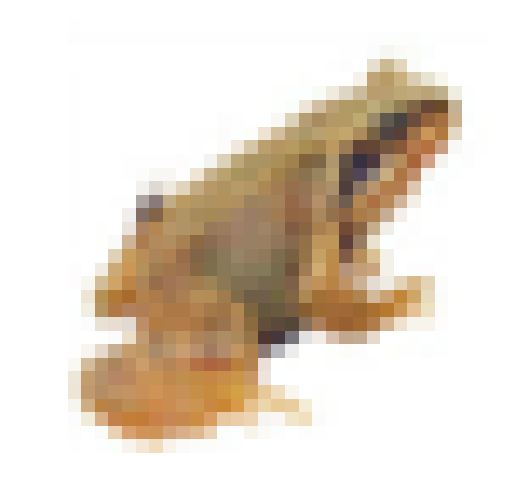

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#import helper
import numpy as np

# Explore the dataset
batch_id = 3
sample_id = 3

#helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)
display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

# Implement Preprocess Functions

## Normalize

In the cell below, implement the normalize function to take in image data, x, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive. The return object should be the same shape as x.

In [8]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    #print(x)
    # TODO: Implement Function
    return x / 255

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_normalize(normalize)
test_normalize(normalize)

Tests Passed


# One-hot encode

Just like the previous code cell, we will be implementing a function for preprocessing. This time, we will implement the one_hot_encode function. The input, x, are a list of labels. Implement the function to return the list of labels as One-Hot encoded Numpy array. The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to one_hot_encode. Make sure to save the map of encodings outside the function.

In [12]:
from keras.utils import np_utils

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    return np_utils.to_categorical(x)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

#tests.test_one_hot_encode(one_hot_encode)
test_one_hot_encode(one_hot_encode)

Tests Passed


# Randomize Data

As we saw from exploring the data above, the order of the samples are randomized. It doesn't hurt to randomize it again, but we don't need to for this dataset.

# Preprocess all the data and save it

Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
#helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)
preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point

This is our first checkpoint. If we ever decide to come back to this notebook or have to restart the notebook, we can start from here. The preprocessed data has been saved to disk.

In [14]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
#import problem_unittests as tests
#import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

# Build the network

For the neural network, we will build each layer into a function. Most of the code we have seen has been outside of functions. To test our code more thoroughly, we require that we put each layer in a function. This allows us to give us better feedback and test for simple mistakes using our unittests before you submit our project.

If we are finding it hard to dedicate enough time for this course a week, we've provided a small shortcut to this part of the project. In the next couple of problems, we will have the option to use TensorFlow Layers or TensorFlow Layers (contrib) to build each layer, except "Convolutional & Max Pooling" layer. TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

If we would like to get the most of this course, try to solve all the problems without TF Layers. Let's begin!

# Input

The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions

    Implement neural_net_image_input
        Return a TF Placeholder
        Set the shape using image_shape with batch size set to None.
        Name the TensorFlow placeholder "x" using the TensorFlow name parameter in the TF Placeholder.
    Implement neural_net_label_input
        Return a TF Placeholder
        Set the shape using n_classes with batch size set to None.
        Name the TensorFlow placeholder "y" using the TensorFlow name parameter in the TF Placeholder.
    Implement neural_net_keep_prob_input
        Return a TF Placeholder for dropout keep probability.
        Name the TensorFlow placeholder "keep_prob" using the TensorFlow name parameter in the TF Placeholder.
These names will be used at the end of the project to load your saved model.

Note: None for shapes in TensorFlow allow for a dynamic size.

In [15]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    shape = [None] + list(image_shape)
    return tf.placeholder(tf.float32, shape = shape, name = "x")

def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape = [None,n_classes], name = "y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name = "keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
#tests.test_nn_image_inputs(neural_net_image_input)
#tests.test_nn_label_inputs(neural_net_label_input)
#tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)
test_nn_image_inputs(neural_net_image_input)
test_nn_label_inputs(neural_net_label_input)
test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


# Convolution and Max Pooling Layer

Convolution layers have a lot of success with images. For this code cell, we should implement the function conv2d_maxpool to apply convolution then max pooling:

    1. Create the weight and bias using conv_ksize, conv_num_outputs and the shape of x_tensor.
    2. Apply a convolution to x_tensor using weight and conv_strides.
        We recommend you use same padding, but you're welcome to use any padding.
    3. Add bias
    4. Add a nonlinear activation to the convolution.
    5. Apply Max Pooling using pool_ksize and pool_strides.
        We recommend you use same padding, but you're welcome to use any padding.

Note: we can't use TensorFlow Layers or TensorFlow Layers (contrib) for this layer. we are free to use any TensorFlow package for all the other layers.

In [16]:
#Create the weight and bias using conv_ksize, conv_num_outputs and the shape of x_tensor.

def new_weights(shape):
    # Create new weights for each layer
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
    
def new_biases(length):
    # Create new biases for each layer
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [17]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    
    # Number of input units to a layer
    conv_num_inputs = x_tensor.get_shape().as_list()[3]
    
    conv_height = conv_ksize[0]
    conv_width = conv_ksize[1]
    
    conv_shape = [conv_height, conv_width, conv_num_inputs, conv_num_outputs]
    
    # Update the weights before building the convolutional neural network
    weights = new_weights(shape = conv_shape)
    
    x_tensor = tf.nn.conv2d(input = x_tensor,
                            filter = weights,
                            strides = [1, conv_strides[0], conv_strides[1], 1],
                            padding = 'SAME')
    
    # Update the biases before applying them
    biases = new_biases(length = conv_num_outputs)
    x_tensor += biases
    
    # Apply the activation function
    x_tensor = tf.nn.elu(x_tensor)
    
    x_tensor = tf.nn.max_pool(value = x_tensor,
                               ksize=[1, conv_height, conv_width, 1],
                               strides=[1, pool_strides[0], pool_strides[1], 1],
                               padding='SAME')
    
    return x_tensor 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_con_pool(conv2d_maxpool)
test_con_pool(conv2d_maxpool)

Tests Passed


# Flatten Layer

Implement the flatten function to change the dimension of x_tensor from a 4-D tensor to a 2-D tensor. The output should be the shape (Batch Size, Flattened Image Size). we can use TensorFlow Layers or TensorFlow Layers (contrib) for this layer.

In [18]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    
    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]
    layer_shape = x_tensor.get_shape()
    
    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    x_tensor = tf.reshape(x_tensor, [-1, num_features])
    
    return x_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_flatten(flatten)
test_flatten(flatten)

Tests Passed


# Fully-Connected Layer

Implement the fully_conn function to apply a fully connected layer to x_tensor with the shape (Batch Size, num_outputs). we can use TensorFlow Layers or TensorFlow Layers (contrib) for this layer.

In [19]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    num_inputs = x_tensor.get_shape().as_list()[1]
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)
    
    layer = tf.add(tf.matmul(x_tensor, weights), biases)

    layer = tf.nn.elu(layer)
    
    return layer

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_fully_conn(fully_conn)
test_fully_conn(fully_conn)

Tests Passed


# Output Layer

Implement the output function to apply a fully connected layer to x_tensor with the shape (Batch Size, num_outputs). we can use TensorFlow Layers or TensorFlow Layers (contrib) for this layer.

Note: Activation, softmax, or cross entropy shouldn't be applied to this

In [20]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    
    num_inputs = x_tensor.get_shape().as_list()[1]
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)
    
    layer = tf.add(tf.matmul(x_tensor, weights), biases)
    
    return layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_output(output)
test_output(output)

Tests Passed


# Create Convolutional Model

Implement the function conv_net to create a convolutional neural network model. The function takes in a batch of images, x, and outputs logits. Use the layers we created above to create this model:

1. Apply 1, 2, or 3 Convolution and Max Pool layers
2. Apply a Flatten Layer
3. Apply 1, 2, or 3 Fully Connected Layers
4. Apply an Output Layer
5. Return the output
6. Apply TensorFlow's Dropout to one or more layers in the model using keep_prob.

In [21]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Layer 1
    x1 = conv2d_maxpool(x_tensor = x, 
                   conv_num_outputs = 32, 
                   conv_ksize = (5,5), 
                   conv_strides = (2,2), 
                   pool_ksize = (2,2), 
                   pool_strides = (1,1))
    
    x1 = tf.nn.dropout(x1, keep_prob)
    
    # Layer 2
    x2 = conv2d_maxpool(x_tensor = x1, 
                   conv_num_outputs = 64, 
                   conv_ksize = (5,5), 
                   conv_strides = (1,1), 
                   pool_ksize = (2,2), 
                   pool_strides = (1,1))
    
    x2 = tf.nn.dropout(x2, keep_prob)
    
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    x2 = flatten(x_tensor = x2)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    x2 = fully_conn(x_tensor = x2,
               num_outputs = 128)
    x2 = fully_conn(x_tensor = x2,
               num_outputs = 256)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    x2 = output(x_tensor = x2,
               num_outputs = 10)
    
    # TODO: return output
    return x2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

#tests.test_conv_net(conv_net)
test_conv_net(conv_net)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Neural Network Built!


# Train the Neural Network

## Single Optimization

Implement the function train_neural_network to do a single optimization. The optimization should use optimizer to optimize in session with a feed_dict of the following:

1. x for image input
2. y for labels
3. keep_prob for keep probability for dropout

This function will be called for each batch, so tf.global_variables_initializer() has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [22]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    
    session.run(optimizer, feed_dict = {x: feature_batch,
                                        y: label_batch,
                                        keep_prob: keep_probability})

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_train_nn(train_neural_network)
test_train_nn(train_neural_network)

Tests Passed


# Show Stats

Implement the function print_stats to print loss and validation accuracy. Use the global variables valid_features and valid_labels to calculate validation accuracy. Use a keep probability of 1.0 to calculate the loss and validation accuracy.

In [23]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    cost_score, accuracy_score = session.run([cost, accuracy], feed_dict = {x: valid_features,
                                                                            y: valid_labels,
                                                                            keep_prob: 1})
    
    print("cost_score = {0:>6.4}, accuracy_score = {1:>3.4%}".format(cost_score, accuracy_score))

# Hyperparameters

Tune the following parameters:

1. Set epochs to the number of iterations until the network stops learning or start overfitting
2. Set batch_size to the highest number that your machine has memory for. Most people set them to common sizes of memory:
    
    64
    128
    256
    ...
    
3. Set keep_probability to the probability of keeping a node using dropout

In [24]:
# TODO: Tune Parameters
#epochs = 20
epochs = 20
#batch_size = 128
batch_size = 64
#keep_probability = 0.7
keep_probability = 0.6

# Train on a Single CIFAR-10 Batch

Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while we iterate on the model to get a better accuracy. Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [25]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
#        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
        for batch_features, batch_labels in load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  cost_score =  1.991, accuracy_score = 29.8000%
Epoch  2, CIFAR-10 Batch 1:  cost_score =   1.57, accuracy_score = 43.7000%
Epoch  3, CIFAR-10 Batch 1:  cost_score =  1.368, accuracy_score = 50.7000%
Epoch  4, CIFAR-10 Batch 1:  cost_score =  1.464, accuracy_score = 48.2600%
Epoch  5, CIFAR-10 Batch 1:  cost_score =  1.242, accuracy_score = 55.9000%
Epoch  6, CIFAR-10 Batch 1:  cost_score =  1.264, accuracy_score = 56.8200%
Epoch  7, CIFAR-10 Batch 1:  cost_score =  1.296, accuracy_score = 57.2000%
Epoch  8, CIFAR-10 Batch 1:  cost_score =  1.389, accuracy_score = 54.1200%
Epoch  9, CIFAR-10 Batch 1:  cost_score =  1.428, accuracy_score = 54.8000%
Epoch 10, CIFAR-10 Batch 1:  cost_score =  1.433, accuracy_score = 56.0000%
Epoch 11, CIFAR-10 Batch 1:  cost_score =  1.404, accuracy_score = 57.9400%
Epoch 12, CIFAR-10 Batch 1:  cost_score =  1.694, accuracy_score = 53.4600%
Epoch 13, CIFAR-10 Batch 1:  cost_score =  1.

# Fully Train the Model

Now that we got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [26]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
#            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            for batch_features, batch_labels in load_preprocess_training_batch(batch_i, batch_size):                
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  cost_score =  1.882, accuracy_score = 34.1600%
Epoch  1, CIFAR-10 Batch 2:  cost_score =  1.853, accuracy_score = 37.8400%
Epoch  1, CIFAR-10 Batch 3:  cost_score =  1.735, accuracy_score = 44.1600%
Epoch  1, CIFAR-10 Batch 4:  cost_score =  1.601, accuracy_score = 44.2000%
Epoch  1, CIFAR-10 Batch 5:  cost_score =  1.313, accuracy_score = 52.4000%
Epoch  2, CIFAR-10 Batch 1:  cost_score =  1.197, accuracy_score = 57.3400%
Epoch  2, CIFAR-10 Batch 2:  cost_score =  1.293, accuracy_score = 54.6000%
Epoch  2, CIFAR-10 Batch 3:  cost_score =  1.213, accuracy_score = 58.1200%
Epoch  2, CIFAR-10 Batch 4:  cost_score =  1.331, accuracy_score = 54.2800%
Epoch  2, CIFAR-10 Batch 5:  cost_score =   1.06, accuracy_score = 62.9600%
Epoch  3, CIFAR-10 Batch 1:  cost_score =  1.033, accuracy_score = 64.1000%
Epoch  3, CIFAR-10 Batch 2:  cost_score =  1.143, accuracy_score = 60.9800%
Epoch  3, CIFAR-10 Batch 3:  cost_score =   1.07, accuracy_score = 62.8600%


# Checkpoint

The model has been saved to disk.

# Test Model

Test the model against the test dataset. This will be our final accuracy. we should have an accuracy greater than 50%. If we don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6957603503184714



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


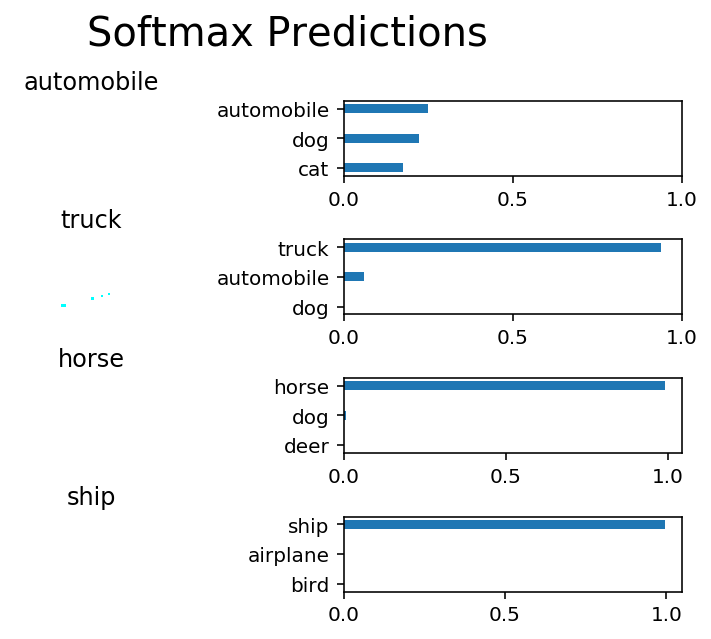

In [27]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
#import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
#        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
        for train_feature_batch, train_label_batch in batch_features_labels(test_features, test_labels, batch_size):            
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        
#        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()